In [79]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score
)
from matplotlib.colors import ListedColormap 

from matplotlib import pyplot as plt
iris_dataset = load_iris()

data = np.hstack([iris_dataset.data, iris_dataset.target.reshape(-1, 1)])

x_train, x_test, y_train, y_test = train_test_split(data[data[:, -1] != 2, 0:2], data[data[:, -1] != 2, -1],test_size=0.3, random_state=0)

In [61]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False, max_depth = 1):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        
        
        
        for i in range(self.max_depth): 
            self._calc_information_gain(X, y)



        return self

      

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """

        y_pred = np.where(X[:, self.best_feature] < self.criteria, self.left_major, self.right_major)
        return y_pred
    
    def _calc_gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        total = len(y)

        _gini = 0
        for i in zip(classes, counts):
            _gini += np.power(i[1]/total, 2)
        
        return 1 - _gini
    
    def _calc_information_gain(self, features, labels):
        total = len(labels)
        p_gini = self._calc_gini(labels)
        self.entropy = 0
        for x in range(features.shape[1]):
            criteria = np.unique(features[:, x])

            for criterion in criteria:
                l_node = labels[features[:, x] < criterion]
                r_node = labels[features[:, x] >= criterion]
                l_gini = (len(l_node)/total) * self._calc_gini(l_node)
                r_gini = (len(r_node)/total) * self._calc_gini(r_node)
                _gini = p_gini - l_gini - r_gini

                if _gini > self.entropy:
                    self.entropy = _gini
                    self.best_feature = x
                    self.criteria = criterion
                    left, left_count = np.unique(l_node, return_counts=True)
                    right, right_count = np.unique(r_node, return_counts=True)
                    self.right_major = right[right_count.argmax()]
                    self.left_major = left[left_count.argmax()]
                
        

In [80]:
model = ScratchDecesionTreeClassifierDepth1().fit(x_train, y_train)

pred = model.predict(x_test)

In [81]:
x_train.shape

(70, 2)

In [96]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}")


Confusion Matrix: 
 [[14  1]
 [ 1 14]]


In [88]:
print(f"Accuracy: { accuracy_score(y_test, pred)}")
print(f"Recall_ score: { recall_score(y_test, pred)}")
print(f"precision_score: {precision_score(y_test, pred)}")

Accuracy: 0.9333333333333333
Recall_ score: 0.9333333333333333
precision_score: 0.9333333333333333


In [76]:
def decision_region(X,y,slr, xlabel="xlabe", ylabel="ylabel", label=[0, 1]):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    
    plt.title('decision region')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label=label[0])
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label=label[1])
    plt.legend()
    plt.show()

(50000, 2)


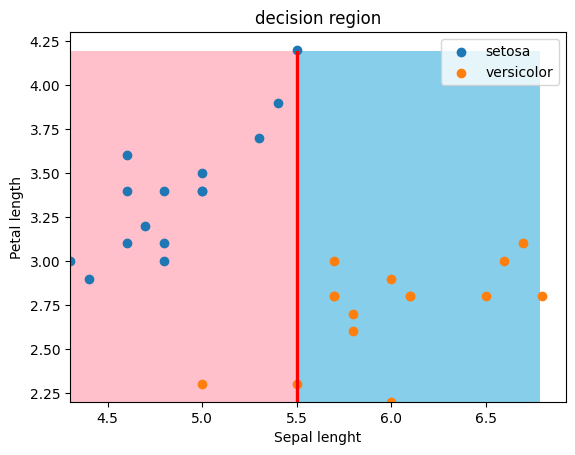

In [86]:
decision_region(x_test, y_test, model, "Sepal lenght", "Petal length", ['setosa' ,'versicolor'] )